In [4]:
import pandas as pd
import os
data = pd.read_csv('modeChoiceData.csv')
data

,ID,time_car,cost_car,time_bus,cost_bus,access_bus,time_air,cost_air,access_air,service_air,time_rail,cost_rail,access_rail,service_rail,choice
0,1,275,50,330,35,20,80,65,55,food,120,45,5,no-frills,air
1,2,275,45,330,15,5,70,110,40,wifi,170,55,25,food,rail
2,3,275,45,390,15,25,70,80,55,no-frills,155,35,5,no-frills,rail
3,4,300,45,300,15,10,60,110,40,wifi,155,65,20,no-frills,rail
4,5,390,35,390,35,10,60,95,45,wifi,155,65,15,food,rail
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3075,3076,345,50,360,30,20,50,80,55,wifi,155,45,5,food,rail
3076,3077,390,35,390,35,25,50,95,35,no-frills,120,75,15,wifi,air
3077,3078,300,30,390,15,5,80,95,45,food,155,45,25,no-frills,car
3078,3079,300,35,330,30,15,90,65,35,food,155,45,20,no-frills,rail


In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.metrics import accuracy_score, precision_score, recall_score
import pandas as pd
import os
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

Add required packages for different classifiers

In [18]:
##---------------------The choice of encoding method---------------------------
#(1) One-Hot Encoding
df = pd.get_dummies(data, columns=['service_air', 'service_rail'])

#(2) Label Encoding
# encoder = LabelEncoder()
# df=data.copy()
# df['service_air'] = encoder.fit_transform(df['service_air'])
# df['service_rail'] = encoder.fit_transform(df['service_rail'])

#(3) Dummy Encoding
# df=data.copy()
# dummy_df = pd.get_dummies(df[['service_air', 'service_rail']], drop_first=True)
# df = pd.concat([df, dummy_df], axis=1)
# df=df.drop(['service_air', 'service_rail'],axis=1)

x = df.drop(['choice','ID',], axis=1)
y = df['choice']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

Split train and test dataset with Train/Test = 8/2, and with random_state in a low level.

{'C': 0.01}
Accuracy: 0.5762987012987013
Precision: [0.55244755 0.25       0.49056604 0.66536965]
Recall: [0.57246377 0.04545455 0.52791878 0.66023166]


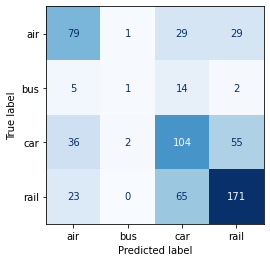

In [8]:
# (1)LR
params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
}
model = LogisticRegression(max_iter=1000, random_state=0)
grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='accuracy')
# Fit the GridSearchCV object to the training data to perform hyperparameter tuning
grid_search.fit(x_train, y_train)
# Retrieve the best hyperparameters identified by the grid search
best_params = grid_search.best_params_
print(best_params)
# Retrieve the best cross-validated accuracy score achieved with the best hyperparameters
best_score = grid_search.best_score_
# Set 'model' to be the best estimator (model with the best hyperparameters) identified by the grid search
model = grid_search.best_estimator_
cmd.from_estimator(model, x_test, y_test,cmap='Blues',colorbar=False)
##---------------------Different measurements---------------------------
print(f'Accuracy: {accuracy_score(y_test,model.predict(x_test))}')
print(f'Precision: {precision_score(y_test,model.predict(x_test),average=None)}')
print(f'Recall: {recall_score(y_test,model.predict(x_test),average=None)}')

D:\Python\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Python\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\Python\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "D:\Python\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\Python\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "D:\Python\Anaconda3\lib\site-packages\sklearn\utils\_response.py", line 85, in _get_response_values
    y_pred = prediction_method(X)
 

{'n_neighbors': 9, 'weights': 'distance'}
Accuracy: 0.5324675324675324
Precision: [0.49710983 0.         0.4301676  0.64705882]
Recall: [0.62318841 0.         0.39086294 0.63706564]


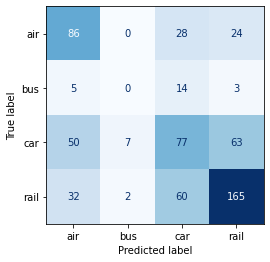

In [9]:
# (2)KNN
params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}
model=KNeighborsClassifier()
grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='accuracy')
# Fit the GridSearchCV object to the training data to perform hyperparameter tuning
grid_search.fit(x_train, y_train)
# Retrieve the best hyperparameters identified by the grid search
best_params = grid_search.best_params_
print(best_params)
# Retrieve the best cross-validated accuracy score achieved with the best hyperparameters
best_score = grid_search.best_score_
# Set 'model' to be the best estimator (model with the best hyperparameters) identified by the grid search
model = grid_search.best_estimator_
cmd.from_estimator(model, x_test, y_test,cmap='Blues',colorbar=False)
##---------------------Different measurements---------------------------
print(f'Accuracy: {accuracy_score(y_test,model.predict(x_test))}')
print(f'Precision: {precision_score(y_test,model.predict(x_test),average=None)}')
print(f'Recall: {recall_score(y_test,model.predict(x_test),average=None)}')

{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Accuracy: 0.5113636363636364
Precision: [0.49635036 0.25       0.4120603  0.5942029 ]
Recall: [0.49275362 0.04545455 0.41624365 0.63320463]


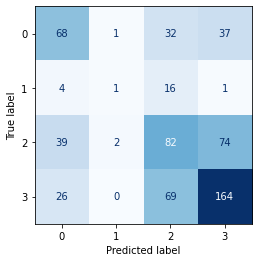

In [13]:
#(3)RF
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
model = RandomForestClassifier(random_state=0)

grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='accuracy')
# Fit the GridSearchCV object to the training data to perform hyperparameter tuning
grid_search.fit(x_train, y_train)
# Retrieve the best hyperparameters identified by the grid search
best_params = grid_search.best_params_
print(best_params)
# Retrieve the best cross-validated accuracy score achieved with the best hyperparameters
best_score = grid_search.best_score_
# Set 'model' to be the best estimator (model with the best hyperparameters) identified by the grid search
model = grid_search.best_estimator_
cmd.from_estimator(model, x_test, y_test,cmap='Blues',colorbar=False)
##---------------------Different measurements---------------------------
print(f'Accuracy: {accuracy_score(y_test,model.predict(x_test))}')
print(f'Precision: {precision_score(y_test,model.predict(x_test),average=None)}')
print(f'Recall: {recall_score(y_test,model.predict(x_test),average=None)}')


{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
Accuracy: 0.5746753246753247
Precision: [0.57462687 0.         0.4841629  0.651341  ]
Recall: [0.55797101 0.         0.54314721 0.65637066]


D:\Python\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


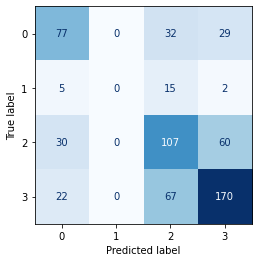

In [19]:
#(4)XGBoost
params = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5]
}
map = {'air': 0, 'bus': 1, 'car': 2,'rail':3}
y_train = y_train.map(map)
y_test = y_test.map(map)
model =  XGBClassifier()


grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='accuracy')
# Fit the GridSearchCV object to the training data to perform hyperparameter tuning
grid_search.fit(x_train, y_train)
# Retrieve the best hyperparameters identified by the grid search
best_params = grid_search.best_params_
print(best_params)
# Retrieve the best cross-validated accuracy score achieved with the best hyperparameters
best_score = grid_search.best_score_
# Set 'model' to be the best estimator (model with the best hyperparameters) identified by the grid search
model = grid_search.best_estimator_
cmd.from_estimator(model, x_test, y_test,cmap='Blues',colorbar=False)
##---------------------Different measurements---------------------------
print(f'Accuracy: {accuracy_score(y_test,model.predict(x_test))}')
print(f'Precision: {precision_score(y_test,model.predict(x_test),average=None)}')
print(f'Recall: {recall_score(y_test,model.predict(x_test),average=None)}')

{'C': 0.1}
Accuracy: 0.564935064935065
Precision: [0.54861111 0.         0.4556962  0.68510638]
Recall: [0.57246377 0.         0.54822335 0.62162162]


D:\Python\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


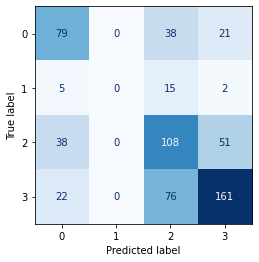

In [20]:
#(5)SVM
## Note: It will costs a long time.
params = {
    'C': [0.1, 1, 10],
}

model= SVC(kernel="linear")

grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='accuracy')
# Fit the GridSearchCV object to the training data to perform hyperparameter tuning
grid_search.fit(x_train, y_train)
# Retrieve the best hyperparameters identified by the grid search
best_params = grid_search.best_params_
print(best_params)
# Retrieve the best cross-validated accuracy score achieved with the best hyperparameters
best_score = grid_search.best_score_
# Set 'model' to be the best estimator (model with the best hyperparameters) identified by the grid search
model = grid_search.best_estimator_
cmd.from_estimator(model, x_test, y_test,cmap='Blues',colorbar=False)
##---------------------Different measurements---------------------------
print(f'Accuracy: {accuracy_score(y_test,model.predict(x_test))}')
print(f'Precision: {precision_score(y_test,model.predict(x_test),average=None)}')
print(f'Recall: {recall_score(y_test,model.predict(x_test),average=None)}')